**Get the list of words**

In [1]:
# Get the dataset from Github
!wget --no-check-certificate \
    "https://raw.githubusercontent.com/dwyl/english-words/master/words.txt" \
    -O "/tmp/words.txt"

--2023-03-26 04:47:07--  https://raw.githubusercontent.com/dwyl/english-words/master/words.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4862992 (4.6M) [text/plain]
Saving to: ‘/tmp/words.txt’

/tmp/words.txt      100%[===================>]   4.64M  --.-KB/s    in 0.09s   

2023-03-26 04:47:07 (51.6 MB/s) - ‘/tmp/words.txt’ saved [4862992/4862992]



**Open the words for processing**

In [2]:
words = open('/tmp/words.txt', 'r').read().splitlines()

**Basic Analysis of the word list**

In [3]:
words[:10]

['2',
 '1080',
 '&c',
 '10-point',
 '10th',
 '11-point',
 '12-point',
 '16-point',
 '18-point',
 '1st']

In [4]:
len(words)

466550

In [5]:
min(len(word) for word in words)

1

In [6]:
max(len(word) for word in words)

45

**Preprocess the words**

In [27]:
words = [word.lower() for word in words]

**Create a 2D Bigram**

In [28]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [ ]:
sorted(b.items(), key = lambda kv: -kv[1])

**Create the bigram using Pytorch**

In [30]:
import torch

In [38]:
N = torch.zeros((45, 45), dtype=torch.int32)

In [40]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i,s in enumerate(chars)}
stoi['<S>'] = 43;
stoi['<E>'] = 44;

itos = {i:s for s,i in stoi.items()}

In [39]:
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1][ix2] += 1

**Visualize the Bigram**

(-0.5, 44.5, 44.5, -0.5)

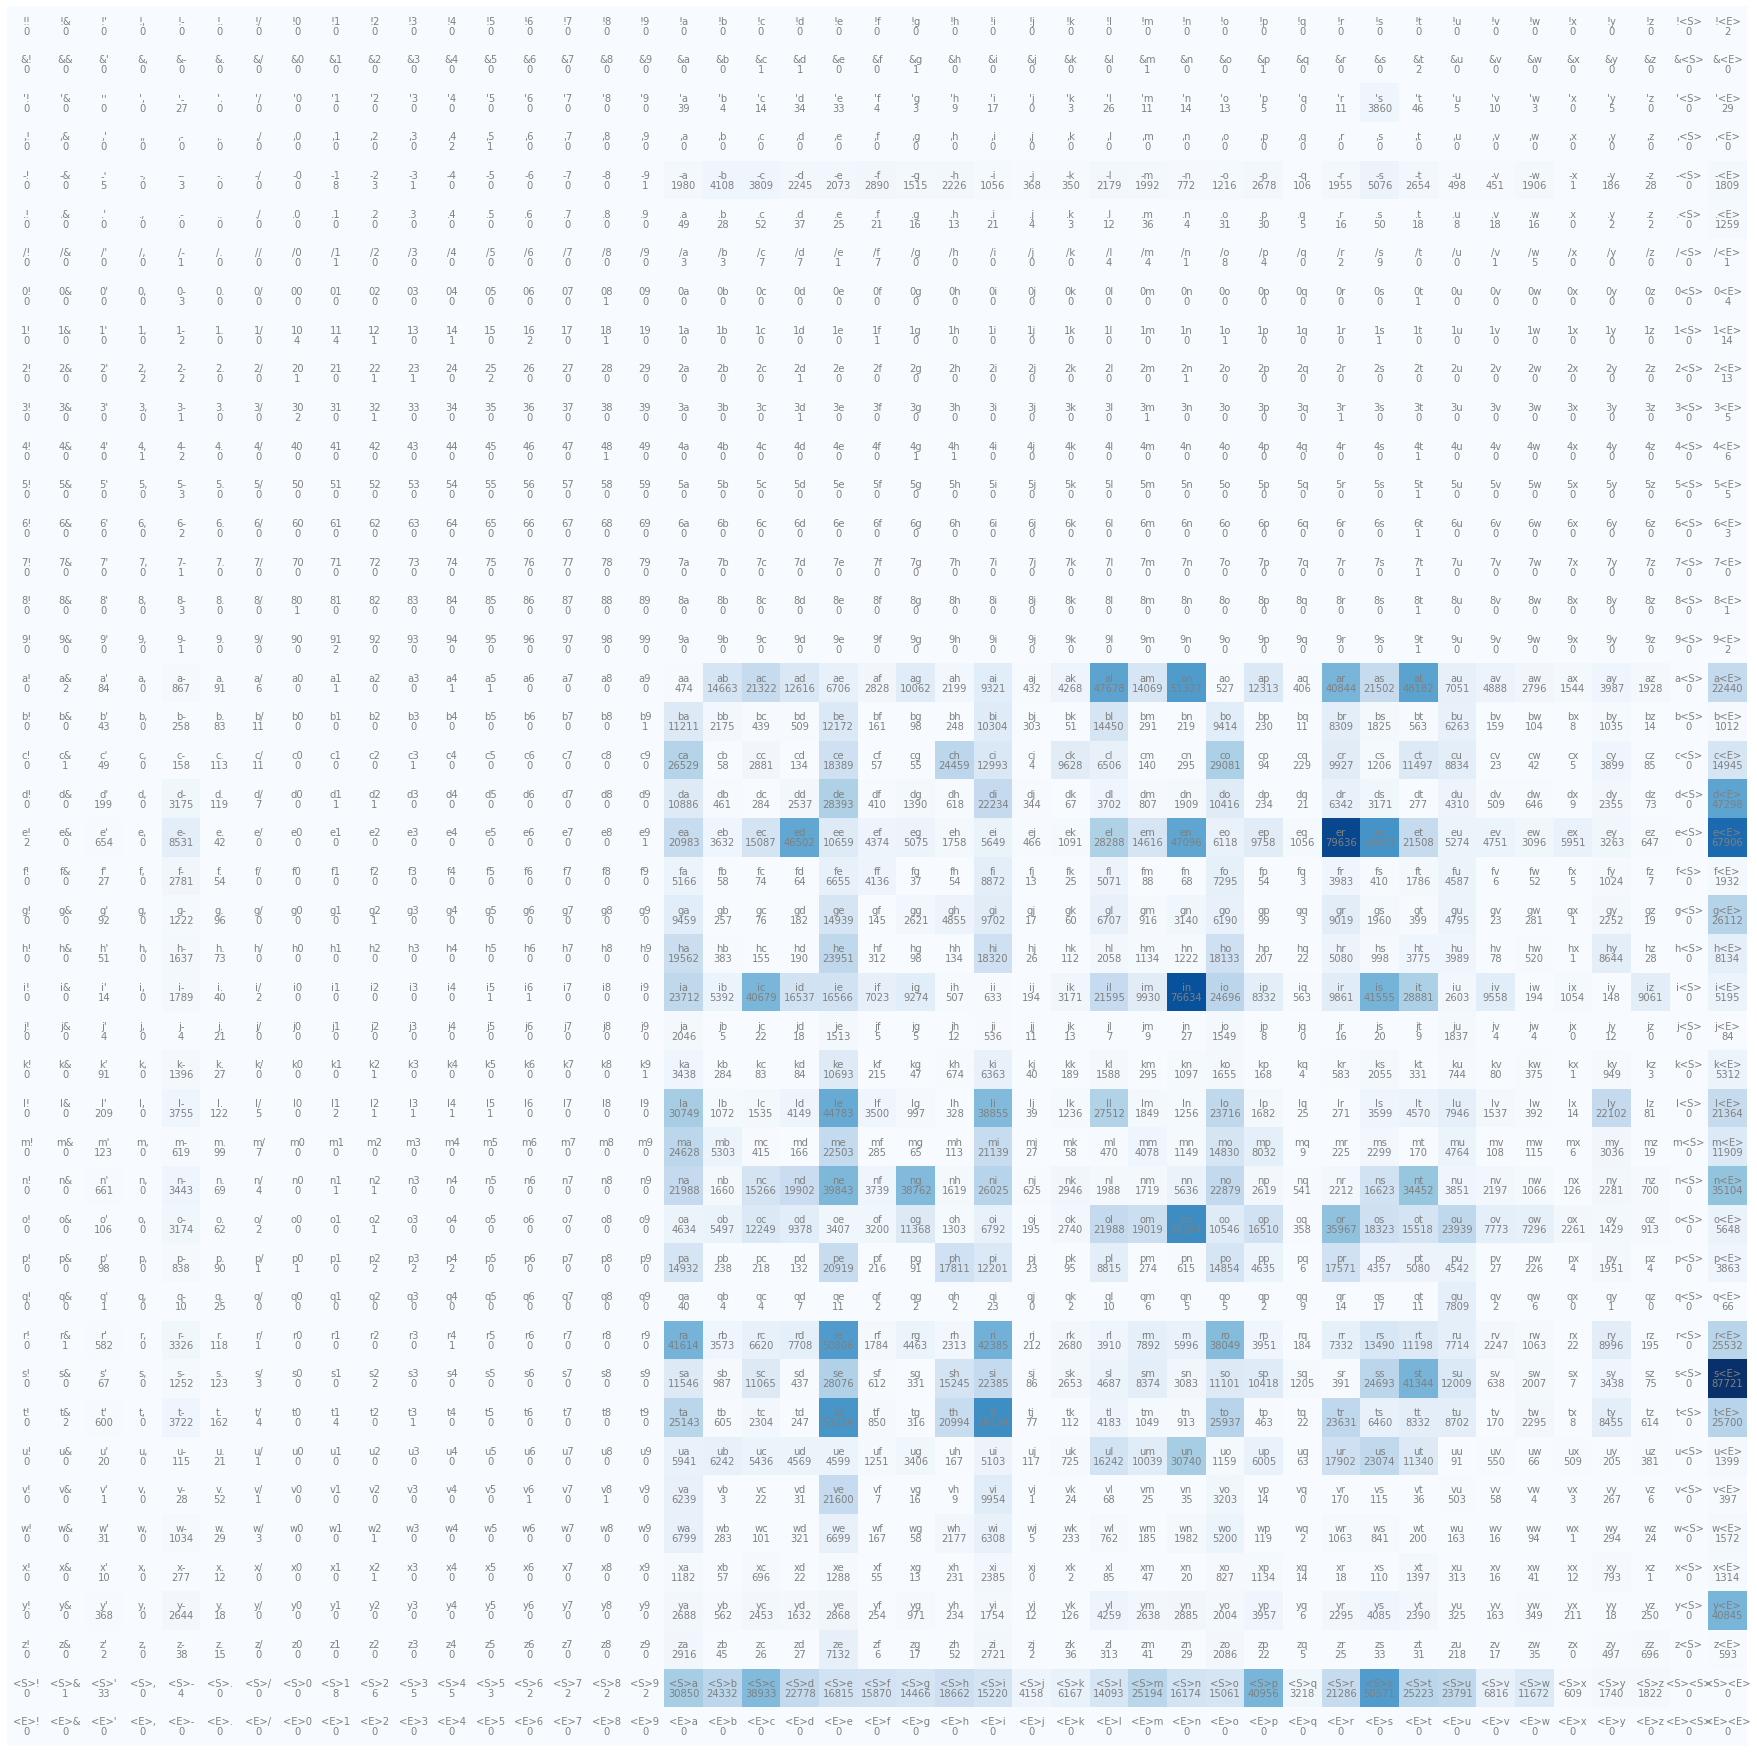

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(32,32))
plt.imshow(N, cmap='Blues')

for i in range(45):
  for j in range(45):
    chstr = itos[i] + itos[j]
    plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
    plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis('off')